<a href="https://colab.research.google.com/github/CristianS1988/GooSL/blob/main/Laboratorio_K-Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction
Existen muchos modelos para clustering. En este lab, estaremos presentando el modelo que es considerado el más simple de todos. Aunque simple, el K-Means se utiliza mucho para clustering en varias aplicaciones de ciencia de datos, especialmente si se necesita de forma rápida descubrir nuevas conclusiones a partir de datos no etiquetados. En este lab, aprenderá a utilizar k-means para segmentar clientes.

### Algunas aplicaciones de K-Means del mundo real:

* Segmentacion del cliente
* Entender lo que los visitantes de un sitio web intentan realizar
* Reconocimiento de patrones
* Machine learning
* Compresión de datos

En este lab practicamos clustering k-means con 2 ejemplos:

* k-means en un dataset generado al azar
* Usando K-Means para la segmentación del cliente

Importar librerias

Importemos primero las librerías que se necesitan.

In [3]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs
%matplotlib inline

# k-Media en un dataset generado aleatoriamente

¡Creemos nuestro propio dataseet para este lab!

Necesitamos primero configurar una semilla aleatoria(random seed). Esta semilla permite replicar el laboratorio. Utilizaremos la función numpy's random.seed(), donde la semilla se establecerá con el valor 0

In [10]:
np.random.seed(0)

Luego, haremos  clusters aleatorios  de puntos usando la clase  make_blobs . La clase  make_blobs  puede aceptar varias entradas, pero estaremos usando concretamente estas. 
Entrada 

* n_samples: El número total de puntos equitativamente divididos entre los clusters. 
* El valor será: 5000 
* centers: El número de centros a generar. 
* El valor será: [[4, 4], [-2, -1], [2, -3],[1,1]] 
* cluster_std: El desvío estándar de los clusters. 
* El valor será: 0.9 

Salida

 * X: Arreglo de la forma [n_samples, n_features]. (Matríz de Distancia)
 Muestras generadas. 
 * y: Arreglo de la forma [n_samples]. (Response Vector)
 Las etiquetas de números enteros para la pertenencia de cluster en cada muestra. 

In [11]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

Mostrar los puntos de los datos generados al azar.

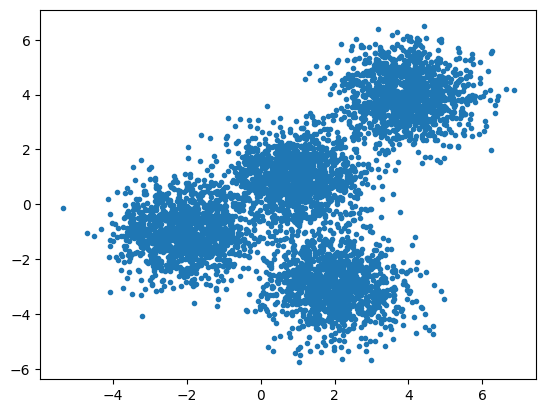

In [12]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

## Estableciendo K-Means
Ahora que tenemos nuestros datos aleatorios, configuremos nuestro Clustering K-Means.

La clase KMedias tiene muchos parámetros que se pueden utilizar, pero estaremos usando estos tres:

 * init: Método de inicialización de los centroides. 
 * El valor será: "k-means++" 
 * k-means++: Elije centros de clusters iniciales eficientes para el clustering k-media de forma tal de acelerar la convergencia.

* n_clusters: El número de clusters a formar y la cantidad de centroides a generar. 
* El valor será: 4 (tenemos 4 centros)

* n_init: Cantidad de veces que el algoritmo K-Means se ejecutará con diferentes semillas centroides. El resultado final será la mejor salida de consecutivas ejecuciones de n_init en términos de inercia. 
* El valor será: 12 

Inicializar K-Means con estos parámetros, donde el parámetro de salida se llama k_means.

In [13]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

Ahora, unamos el modelo K-Means con la matriz de distancia que creamos anteriormente,  X 

In [14]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

Ahora juntemos las etiquetas de cada punto en el modelo usando el atributo de K-Means  .labels_  y lo guardamos como  k_means_labels  

In [15]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0], dtype=int32)

También obtendremos las coordenadas de los centros del cluster usando K-Means  .cluster_centers_  y guardémoslo en  k_means_cluster_centers 

In [16]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

## Creando la Trama
En este momento, tenemos los datos generados al azar y el modelo K-Means inicializado. Podemos dibujarlos y ver de qué se trata!

Favor leer todo el código y los comentarios para entender cómo dibujar el modelo.



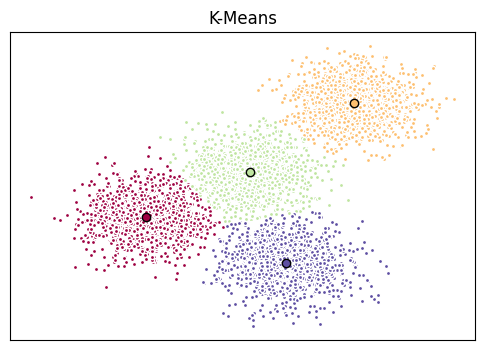

In [18]:
# Inicializar el dibujo con las dimensiones especificadas.
fig = plt.figure(figsize=(6, 4))

# Los colores usan un mapa de color, dónde produciremos un arreglo de colores basados en
# el número de etiquetas que hay. Usaremos set(k_means_labels) para obtener
# etiquetas unívocas.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Crear un dibujo
ax = fig.add_subplot(1, 1, 1)

# Loop For que dibuja los puntos de datos y los centroides.
# k tomará valores entre 0-3, los cuales coincidirán con los clusters posibles en el
# que está cada punto.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Crear una lista de todos los puntos, donde aquellos que están 
    # en el cluster (ej. cluster 0) están etiquetados como verdadero, o en su defecto
    # estarán etiquetados como falso.
    my_members = (k_means_labels == k)
    
    # Definir el centroide o centro del cluster.
    cluster_center = k_means_cluster_centers[k]
    
    # Dibjuar los puntos de datos con color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Dibujo de los centroides con un color específico pero una linea más oscura
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Título del dibujo
ax.set_title('K-Means')

# Eliminar los ticks del eje x
ax.set_xticks(())

# Eliminar los ticks del eje y
ax.set_yticks(())

# Mostrar el dibujo
plt.show()


## Práctica
Probar de agrupar el set de datos en 3 clusters  Nota: no vuelvas a generar los datos utiliza el mismo dataset de ántes.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


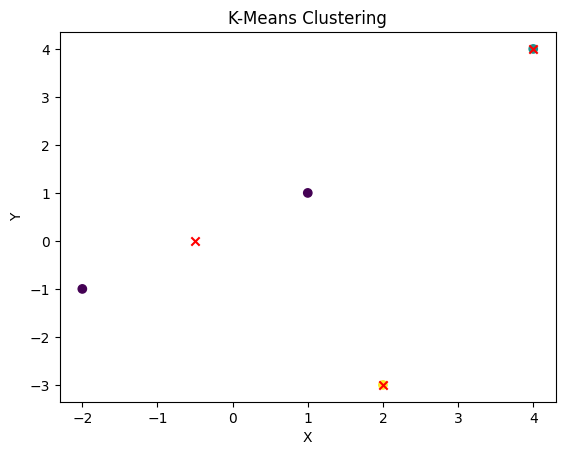

In [19]:
# Define el conjunto de datos
X = np.array([[4, 4], [-2, -1], [2, -3], [1, 1]])

# Crea una instancia del modelo KMeans con 3 clústeres
kmeans = KMeans(n_clusters=3)

# Ajusta el modelo a los datos
kmeans.fit(X)

# Obtiene las etiquetas de los clústeres asignados a cada punto
labels = kmeans.labels_

# Obtiene las coordenadas de los centroides de los clústeres
centroids = kmeans.cluster_centers_

# Visualiza los puntos de datos y los centroides en un gráfico de dispersión
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='r')
plt.title('K-Means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Segmentación de Cliente con K-Means

Imagine que tiene un conjunto de datos de clientes y tiene que aplicar la segmentación de clientes en estos datos históricos.
La segmentación de clientes es la práctica de particionar una base de clientes en particiones de individuos que tengan características similares.
Es una estrategia significativa ya que un negocio puede poner el foco en estos grupos específicos de clientes y ubicar los recursos de marketing lo más eficientemente posible.
Por ejemplo, un grupo podría tener clientes con alto ingreso y bajo riesgo, lo que quiere decir que es muy probable adquieran productos, o se suscriban para un servicio.
Una de las tareas del negocio es retener este tipo de clientes. Otro grupo podría incluir clientes de organizacion sin fines de lucro y asi seguiríamos con más ejemplos.

# Cargar los Datos Desde un Archivo CSV
Antes de trabajar con los datos, se deberá cargar la data que se encuentra en el GES.

In [48]:
import pandas as pd
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


# Pre-procesamiento
Como podrás ver, Address en este set de datos es una variable categórica. El algoritmo k-means no está directamente aplicado a variables categóricas porque la función de la distancia Euclediana no tiene sentido para variables discretas. Por lo que descartaremos esta característica y seguiremos adelante para correr el clustering.

In [49]:
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


# Normalizando el desvío estándar
Ahora normalicemos el set de datos. Pero, ¿por que necesitamos normalizar? La normalización es un método estadístico que ayuda a los algoritmos basados en matemática interpretar características con distintas magnitudes y distribuciones de manera igual. Usamos tandardScaler() para normalizar nuestros set de datos.

In [50]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

### Modeling
Apliquemos k-means en nuestro set de datos y miremos las etiquetas del cluster.

In [51]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 2 0 0 1 2 0 2 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 2 2 2 0 0 2 0 2 0 0 0 0 0 0
 0 0 2 0 2 0 1 0 2 0 0 0 2 2 0 0 2 2 0 0 0 2 0 2 0 2 2 0 0 2 0 0 0 2 2 2 0
 0 0 0 0 2 0 2 2 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0
 0 0 0 0 0 0 2 0 2 2 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 0 0 0 2 0 0 2 0 2 0 0 2 1 0 2 0 0 0 0 0 0 1 2 0 0 0 0 2 0 0 2 2 0 2 0 2
 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 2 0 2 2 0 0 0 0 0 0
 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 2 2 0
 0 0 0 0 2 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 2 0 0 0 1 0 0 0 2 0 2 2 2 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 2 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 1
 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 0 1 0 0 0 0 2 0 2 2 2 0 0 2 2 0 0 0 0 0 0
 0 2 0 0 0 0 2 0 0 0 2 0 

# Descubrimientos
Asignamos las etiquetas a cada fila dentro del marco de datos.

In [52]:
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


Podemos revisar fácilmente los valores centroides sacando el promedio de las características de cada cluster.

In [53]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590


Ahora, miremos la distribuición de los clientes basados en su edad e ingreso:

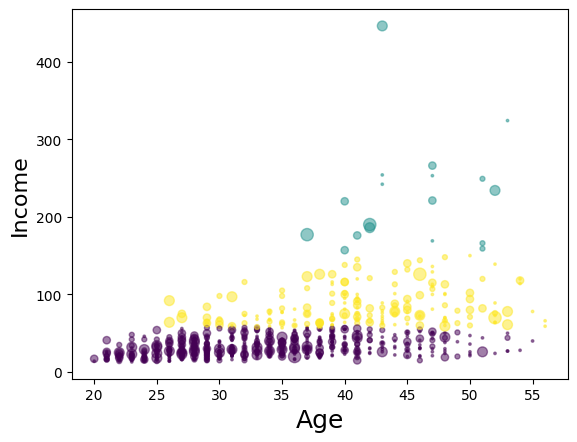

In [54]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

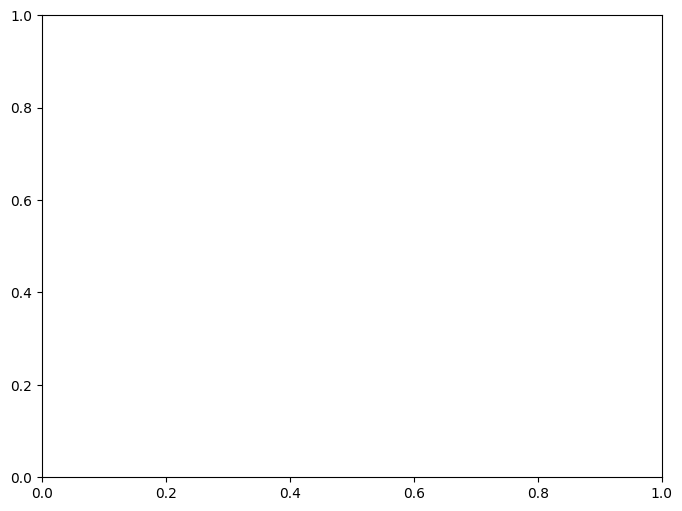

In [55]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(float))
